# 1. Cargar los datos

#### Importamos librerías

In [1]:
# Importamos librerías a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#### Importamos los datos

In [2]:
# URL "raw" del archivo CSV en GitHub
csv_url = "https://raw.githubusercontent.com/josemal98/Proyecto_ML_BEDU/main/Data/heart.csv"

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(csv_url)

# Ahora puedes trabajar con el DataFrame
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# 2. Análisis exploratorio de los datos

In [3]:
# Código para obtener un super resumen automático de los datos

# ! pip install -U ydata-profiling
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df, title="Pandas Profiling Report")
# profile.to_notebook_iframe()

#### Dimensión de nuestros datos

In [4]:
# Dimensión de nuestros datos
print(f"Dimensión de los datos: {df.shape}\n")

Dimensión de los datos: (918, 12)



#### Tipo de dato de cada una de nuestras variables

In [5]:
# Tipo de dato de cada variable
print(f"Tipo de dato de cada variable:\n {df.dtypes}\n")

Tipo de dato de cada variable:
 Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object



#### Cantidad de valores perdidos

In [6]:
# Valores faltantes
print(f"Valores faltantes:\n {df.isna().sum()}")

Valores faltantes:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


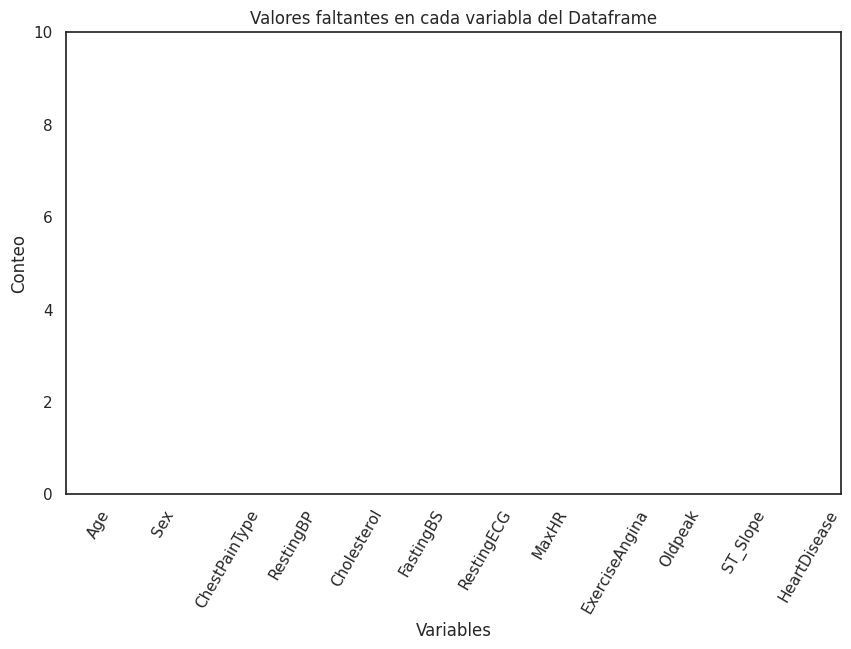

In [138]:

# Configura el estilo de Seaborn
sns.set(style="white")

# Calcula la cantidad de valores faltantes en cada variable
missing_values = df.isna().sum()

# Crea la gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xlabel('Variables')
plt.ylabel('Conteo')
plt.xticks(rotation=60)  # Rotar las etiquetas del eje x para que sean legibles
plt.title('Valores faltantes en cada variabla del Dataframe')

# Establece los límites del eje y de 0 a 10
plt.ylim(0, 10)

plt.show()


#### Analizamos el balance de las categorías de nuestra variable objetivo.

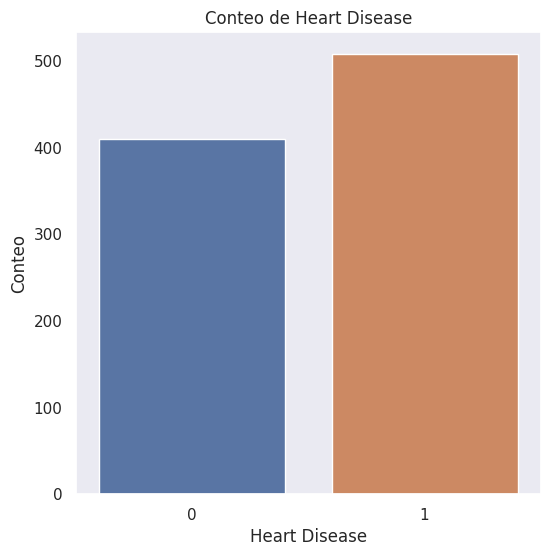

In [151]:
# Configura el estilo de Seaborn
sns.set(style="dark")

# Crea la figura para la gráfica de barras de 'HeartDisease'
plt.figure(figsize=(6, 6))

# Grafica la gráfica de barras de 'HeartDisease'
sns.countplot(data=df, x="HeartDisease")
plt.xlabel('Heart Disease')
plt.ylabel('Conteo')
plt.xticks([0, 1], ['0', '1'])
plt.title('Conteo de Heart Disease')

# Mostrar la figura
plt.show()


#### Analizamos nuestras variables categóricas con respecto a la variable objetivo.

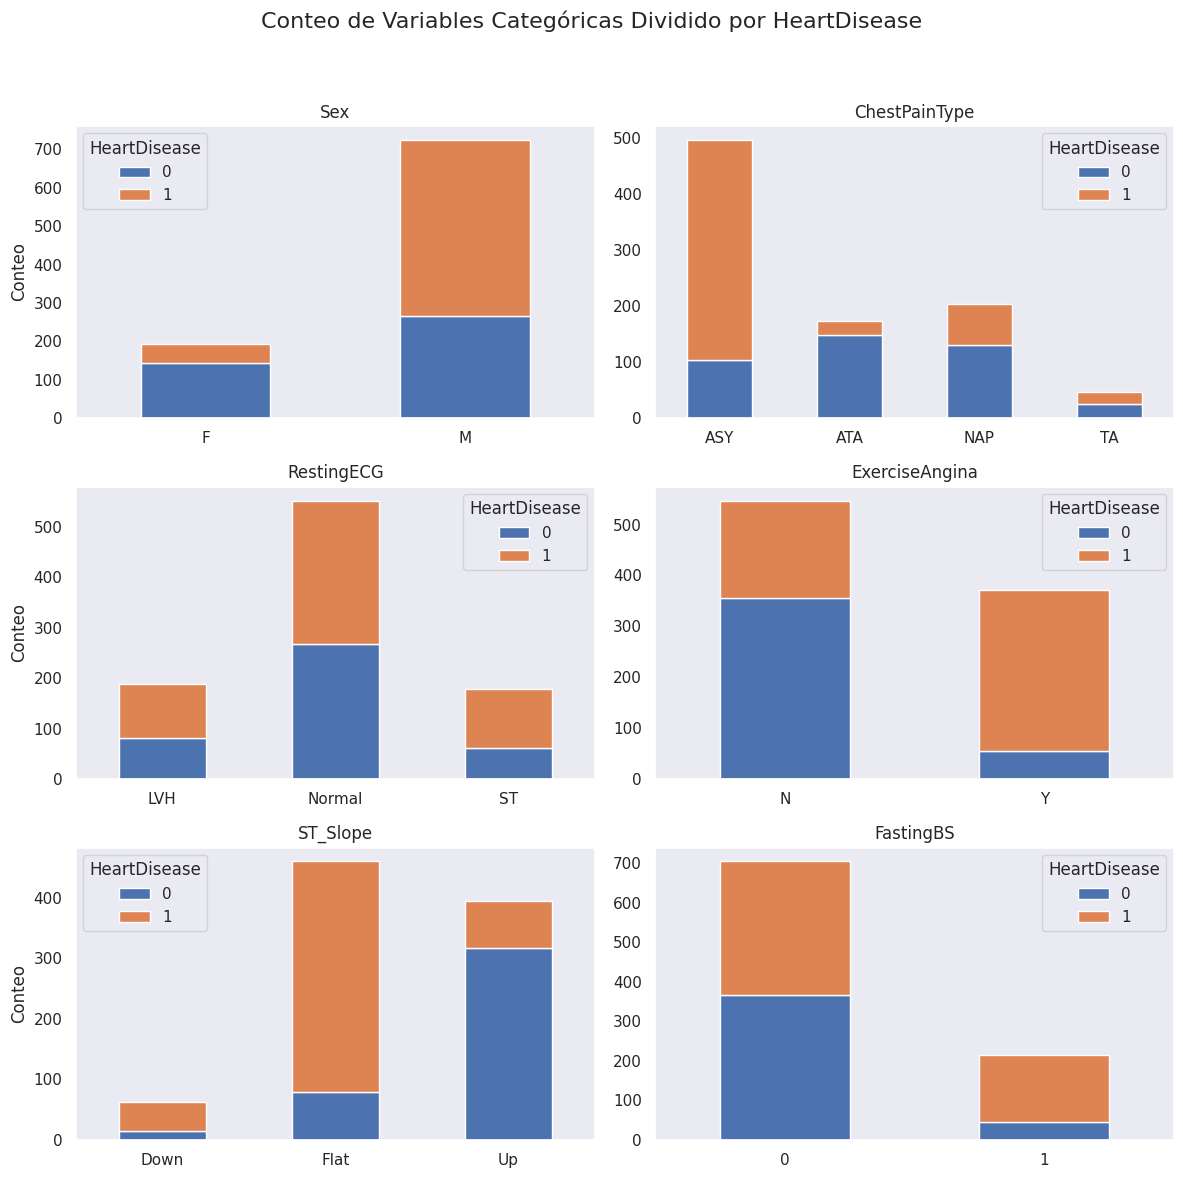

In [149]:
# Configura el estilo de Seaborn en "darkgrid"
sns.set_style("dark")

# Definir las columnas categóricas
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']

# Configurar la figura y los subplots
num_rows = 3
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
fig.subplots_adjust(wspace=0.5, hspace=0.5)  # Ajustar el espacio entre subplots
axes = axes.reshape(-1)

# Iterar a través de las columnas categóricas y crear gráficas de barras apiladas por la variable objetivo
for i, column in enumerate(categorical_columns):
    # Dividir los datos por HeartDisease y contar las frecuencias para cada categoría
    grouped = df.groupby([column, 'HeartDisease']).size().unstack()

    # Crear un gráfico de barras apiladas
    ax = grouped.plot(kind='bar', stacked=True, ax=axes[i])
    ax.set_xlabel('')
    if i % 2 == 0:
        ax.set_ylabel('Conteo')
    else:
        ax.set_ylabel('')
    ax.set_title(column)

    # Desactivar la rotación de los x-labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Eliminar los subplots vacíos si hay menos de 6 variables categóricas
if len(categorical_columns) < num_rows * num_cols:
    for i in range(len(categorical_columns), num_rows * num_cols):
        fig.delaxes(axes[i])

# Agregar un título general a la figura
plt.suptitle('Conteo de Variables Categóricas Dividido por HeartDisease', fontsize=16)

# Ajustar el espaciado entre subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Mostrar la figura
plt.show()


#### Estadísticos básicos de nuestras variables numericas.


In [163]:
# Lista de columnas numéricas
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Estadísticos de las variables numericas
df[numerical_columns].describe().round(2)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,136.81,0.89
std,9.43,18.51,109.38,25.46,1.07
min,28.00,0.00,0.00,60.00,-2.60
25%,47.00,120.00,173.25,120.00,0.00
50%,54.00,130.00,223.00,138.00,0.60
75%,60.00,140.00,267.00,156.00,1.50
max,77.00,200.00,603.00,202.00,6.20


#### Analizamos nuestras variables numéricas con respecto a la variable objetivo.

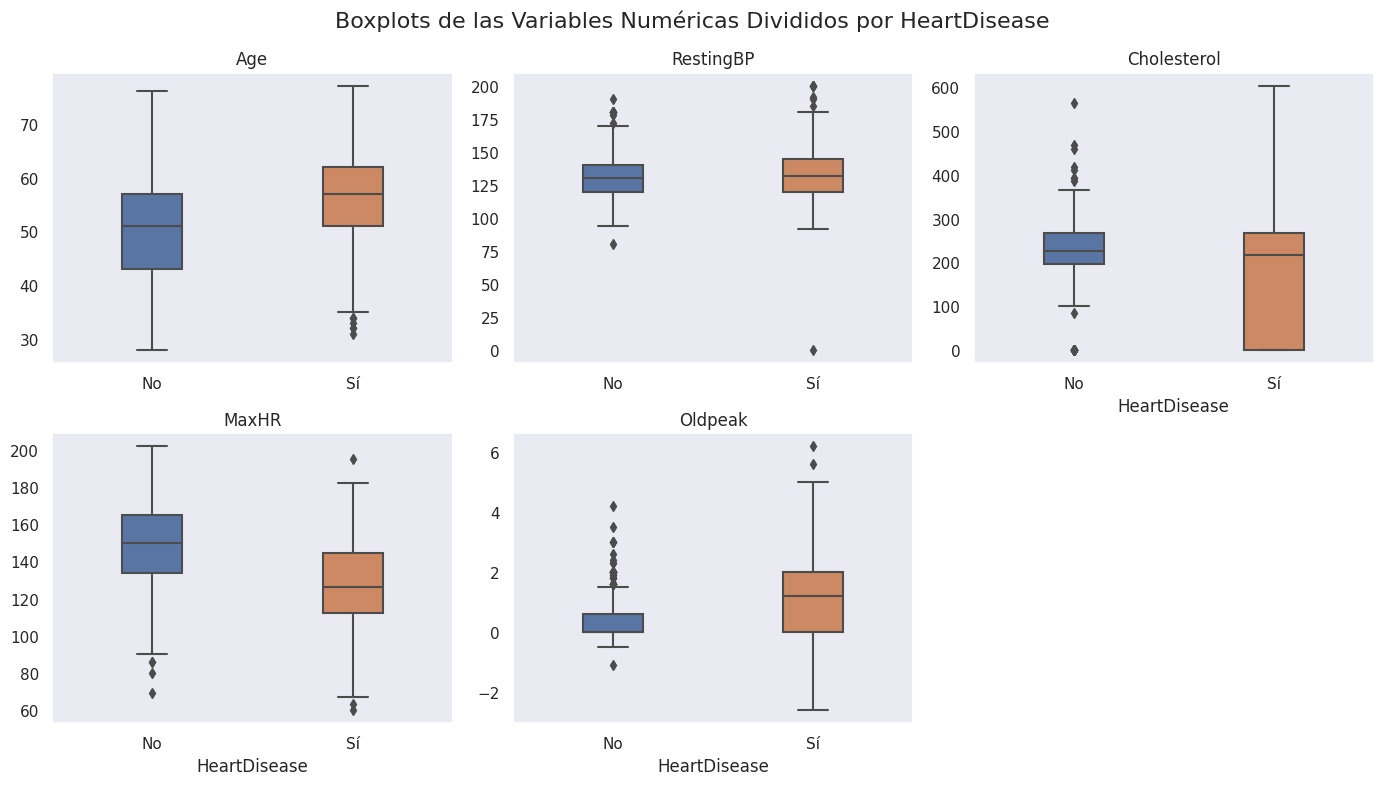

In [148]:
sns.set_style("dark")

# Configurar la figura y los subplots
num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 8))
fig.subplots_adjust(wspace=0.5)  # Ajusta el espacio entre subplots

# Asegurarse de que 'axes' sea una matriz 2D
axes = axes.reshape(-1)

# Iterar a través de las columnas numéricas y crear boxplots divididos por HeartDisease
for i, column in enumerate(numerical_columns):
    sns.boxplot(data=df, x='HeartDisease', y=column, ax=axes[i], width=0.3)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].set_xticklabels(['No', 'Sí'])  # Cambiar las etiquetas del eje x

# Eliminar la subgráfica vacía correspondiente a la variable FastingBS
fig.delaxes(axes[-1])

# Agregar un título general a la figura
fig.suptitle('Boxplots de las Variables Numéricas Divididos por HeartDisease', fontsize=16)

axes[2].set_xlabel('HeartDisease')
axes[3].set_xlabel('HeartDisease')
axes[4].set_xlabel('HeartDisease')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


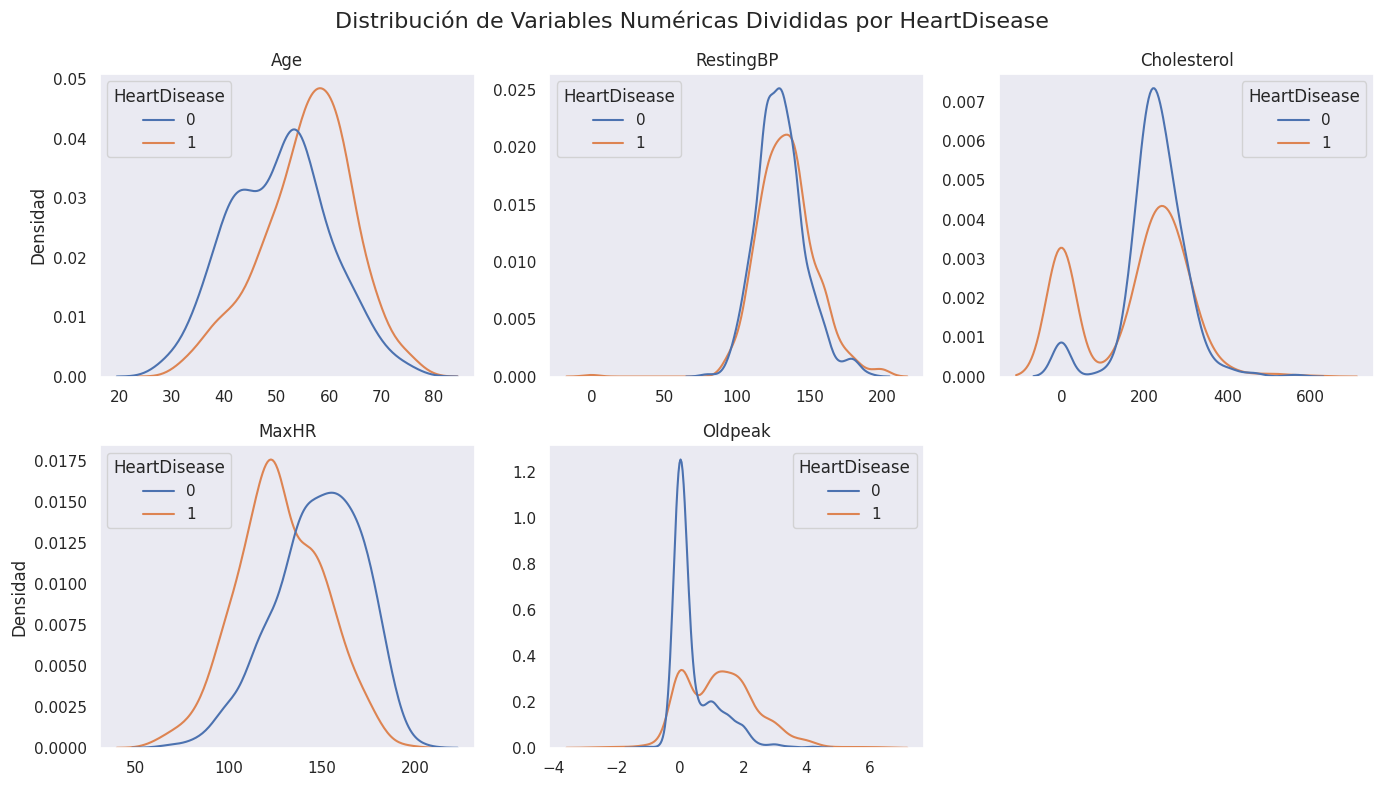

In [162]:

# Configurar la figura y los subplots
num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 8))
fig.subplots_adjust(wspace=0.5)  # Ajusta el espacio entre subplots

# Asegurarse de que 'axes' sea una matriz 2D
axes = axes.reshape(-1)

# Iterar a través de las columnas numéricas y crear gráficos de densidad (KDE) divididos por HeartDisease
for i, column in enumerate(numerical_columns):
    sns.kdeplot(data=df, x=column, hue='HeartDisease', ax=axes[i], common_norm=False)
    axes[i].set_title(column)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Densidad')

# Eliminar la subgráfica vacía correspondiente a la variable FastingBS
fig.delaxes(axes[-1])

# Eliminamos los ylabels
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[4].set_ylabel('')

# Agregar un título general a la figura
fig.suptitle('Distribución de Variables Numéricas Divididas por HeartDisease', fontsize=16)

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


#### Correlación entre todas las variables de nuestro Dataframe.

<ipython-input-12-19376b3fdcaa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


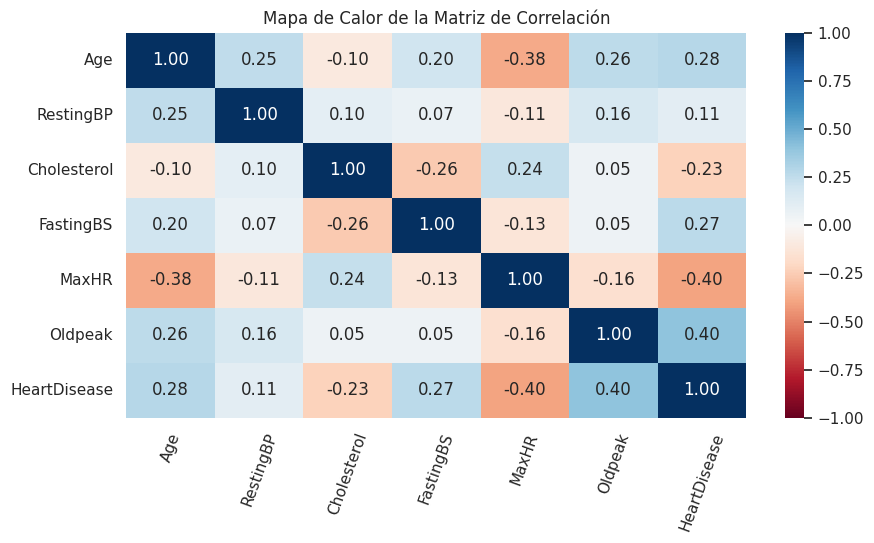

In [12]:
# Calcula la matriz de correlación
correlation_matrix = df.corr()

# Configura el estilo del mapa de calor
sns.set(style="white")

# Crea un mapa de calor de la matriz de correlación
plt.figure(figsize = (10,5))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="RdBu", fmt=".2f", vmin=-1, vmax=1)
plt.title('Mapa de Calor de la Matriz de Correlación')
# Rotar los labels del eje x a 90 grados
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=70)
plt.show()

# 3. Preparación de los datos

## Para realizar esta preparación, retomamos la información de las distintas variables:

- **Age:** age of the patient (years)

- **Sex:** sex of the patient (M: Male, F: Female)
- **ChestPainType:** chest pain type (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)

- **RestingBP:** resting blood pressure (mm Hg)

- **Cholesterol:** serum cholesterol (mm/dl)

- **FastingBS:** fasting blood sugar (1: if FastingBS > 120 mg/dl, 0: otherwise)

- **RestingECG:** resting electrocardiogram results (Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria)

- **MaxHR:** maximum heart rate achieved (Numeric value between 60 and 202)

- **ExerciseAngina:** exercise-induced angina (Y: Yes, N: No)

- **Oldpeak:** oldpeak = ST (Numeric value measured in depression)

- **ST_Slope:** the slope of the peak exercise ST segment (Up: upsloping, Flat: flat, Down: downsloping)

- **HeartDisease:** output class (1: heart disease, 0: Normal)


#### Conversión de variables categóricas a numéricas

**Método One Hot Encoding**

In [17]:
# Utiliza get_dummies para convertir las columnas categóricas en variables numéricas
df_transformed = pd.get_dummies(df, columns=categorical_columns)

# Inspeccionamos el nuevo dataframe
df_transformed

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,FastingBS_0,FastingBS_1
0,40,140,289,172,0.0,0,0,1,0,1,...,0,1,0,1,0,0,0,1,1,0
1,49,160,180,156,1.0,1,1,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,37,130,283,98,0.0,0,0,1,0,1,...,0,0,1,1,0,0,0,1,1,0
3,48,138,214,108,1.5,1,1,0,1,0,...,0,1,0,0,1,0,1,0,1,0
4,54,150,195,122,0.0,0,0,1,0,0,...,0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,132,1.2,1,0,1,0,0,...,0,1,0,1,0,0,1,0,1,0
914,68,144,193,141,3.4,1,0,1,1,0,...,0,1,0,1,0,0,1,0,0,1
915,57,130,131,115,1.2,1,0,1,1,0,...,0,1,0,0,1,0,1,0,1,0
916,57,130,236,174,0.0,1,1,0,0,1,...,1,0,0,1,0,0,1,0,1,0


#### Eliminación de outliers

**Empleamos el criterio de 1.85 veces el rango intercuartílico**

In [127]:
# Creamos una copia de df_transformed
df_transformed2 = df_transformed.copy()

# Itera sobre las columnas numéricas y elimina los outliers
for column in numerical_columns:
    Q1 = df_transformed[column].quantile(0.25)
    Q3 = df_transformed[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.85 * IQR
    upper_bound = Q3 + 1.85 * IQR

    # Filtra los valores que no son outliers
    df_transformed2 = df_transformed2[(df_transformed2[column] >= lower_bound) & (df_transformed2[column] <= upper_bound)]


# Calculamos la cantidad de outliers eliminados
print(f"Cantidad de outliers detectados: {len(df_transformed) - len(df_transformed2)}")

Cantidad de outliers detectados: 37


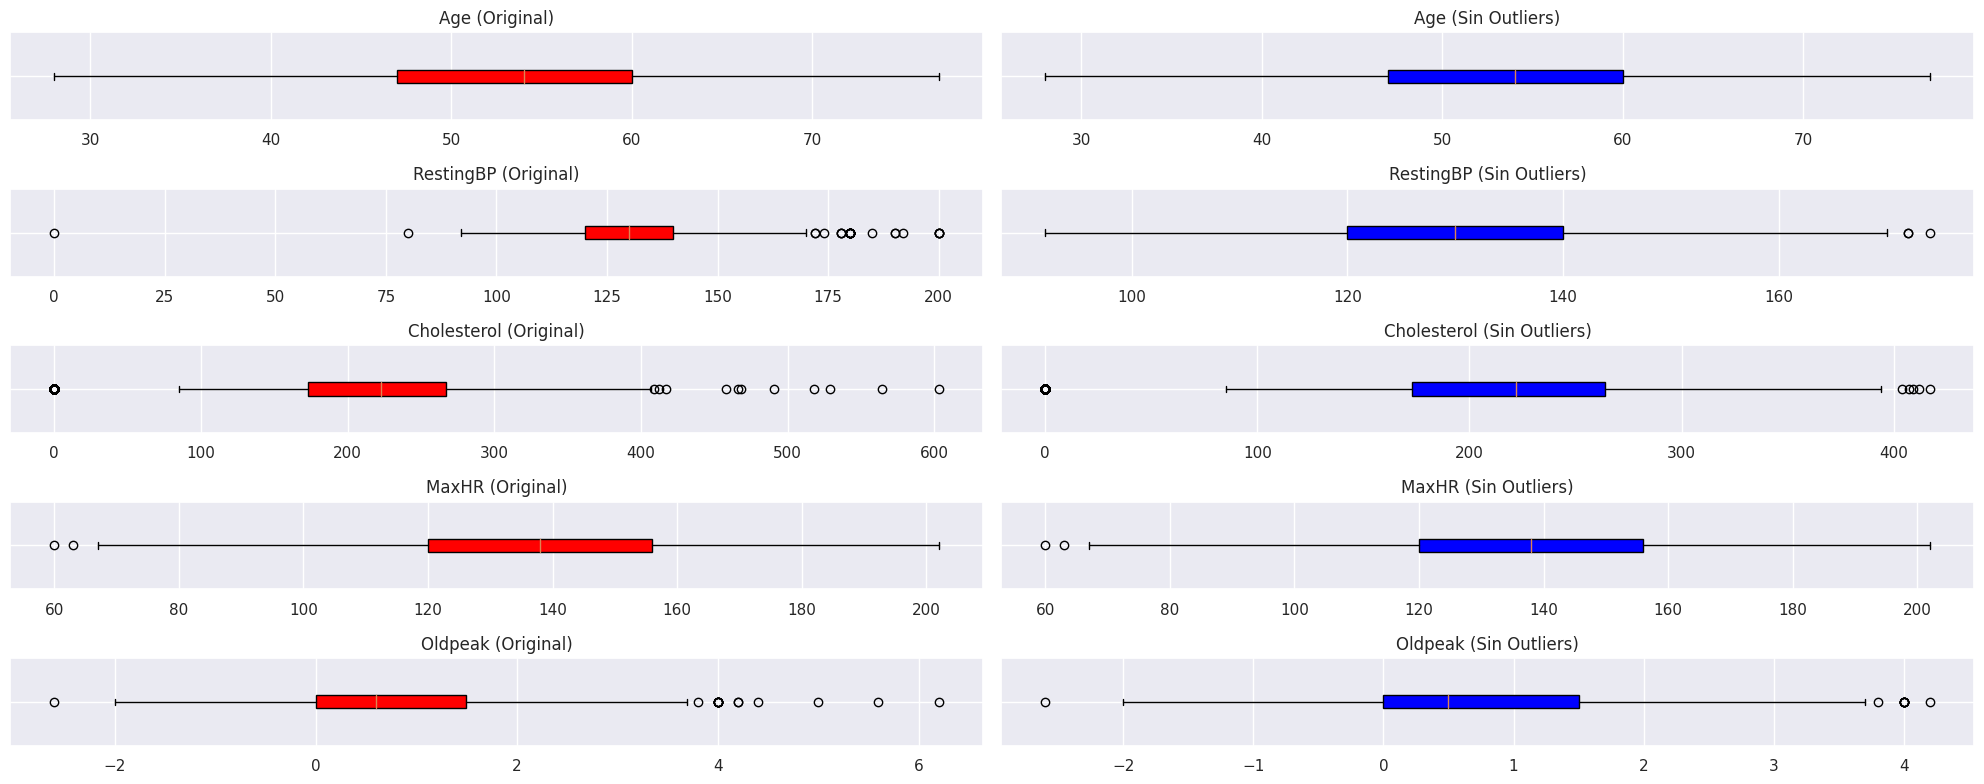

In [128]:

# Configurar la figura y los subplots con orientación horizontal
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 8))

# Iterar a través de las columnas numéricas y crear boxplots horizontales
for i, column in enumerate(numerical_columns):
    # Boxplot original en rojo con relleno rojo
    axes[i, 0].boxplot(df[column], vert=False, patch_artist=True, boxprops=dict(facecolor='red'))
    axes[i, 0].set_title(f'{column} (Original)')

    # Boxplot sin outliers en azul con relleno azul
    axes[i, 1].boxplot(df_transformed2[column], vert=False, patch_artist=True, boxprops=dict(facecolor='blue'))
    axes[i, 1].set_title(f'{column} (Sin Outliers)')

    # Eliminar las etiquetas en la columna de la derecha
    axes[i, 0].set_yticklabels([])
    axes[i, 1].set_yticklabels([])

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


# 4. Selección del modelo

# 5. Entrenamiento del modelo

# 6. Evaluación del modelo